# Grafica Lista de adyacencia sin coordenadas ni direcciones

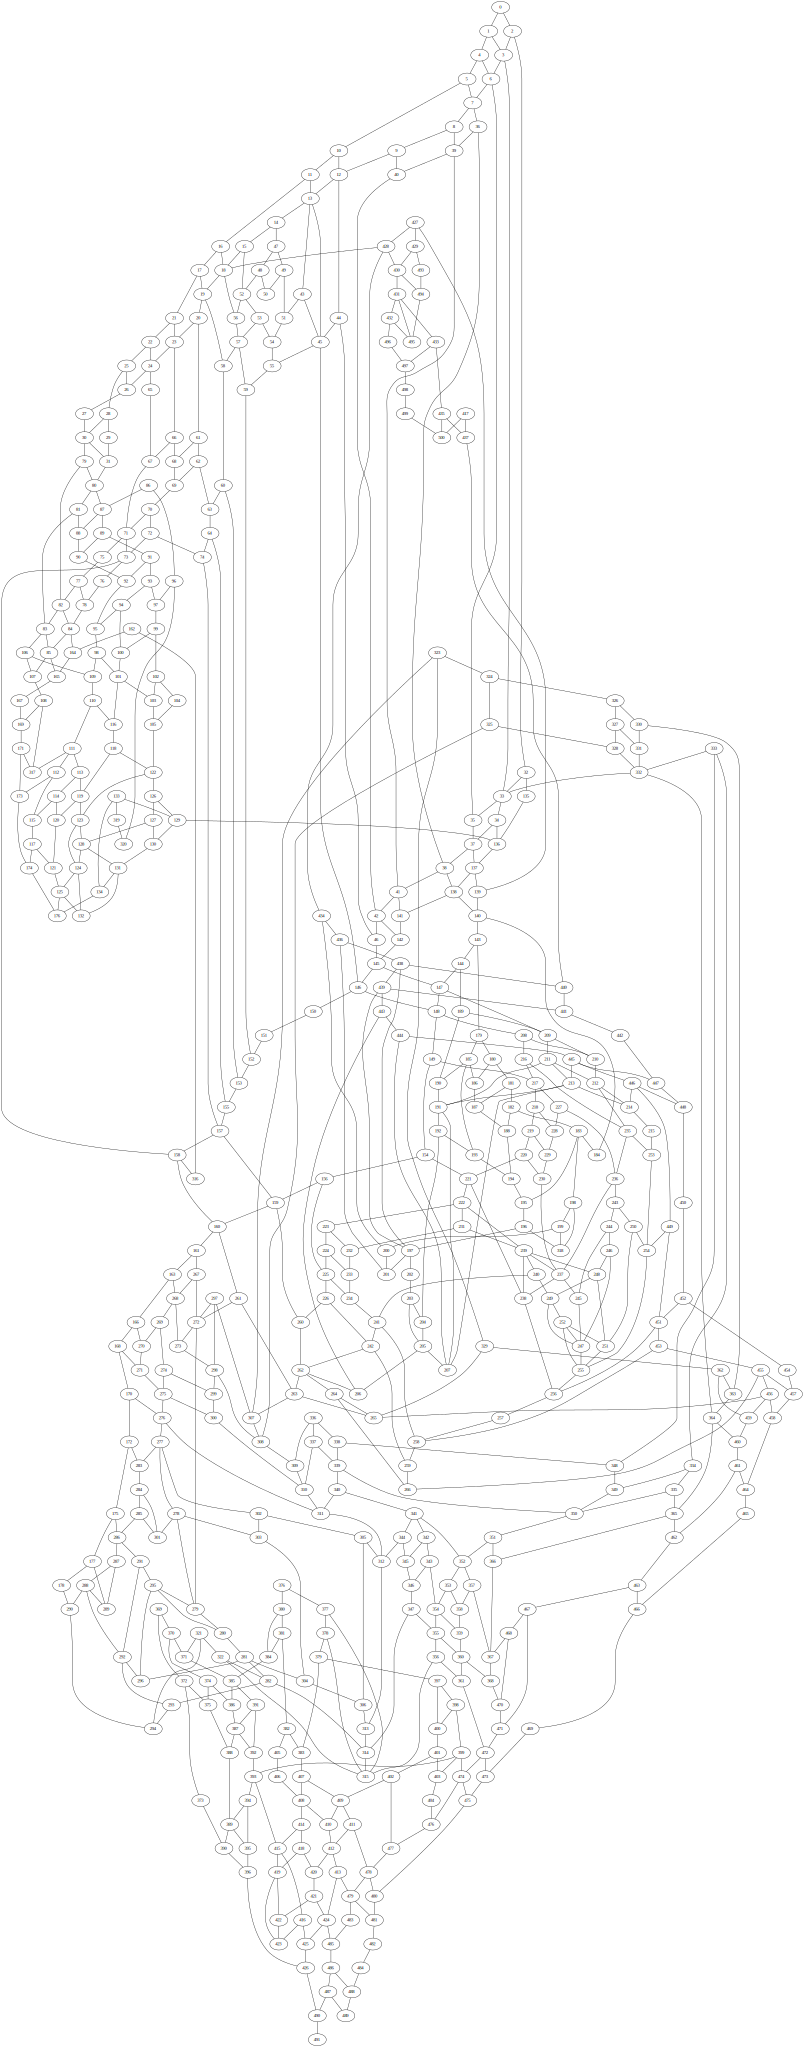

In [1]:
import graphviz as gv
def drawG_al(G, directed=False, path=[]):
  graph = gv.Digraph("felicidad") if directed else gv.Graph("alegria")
  n = len(G)
  added = set()
  for v, u in enumerate(path):
    if u != -1:
      graph.edge(str(u), str(v), dir="forward", penwidth="1", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  for u in range(n):
    for v in G[u]:
      if not directed and not f"{u},{v}" in added:  
        added.add(f"{u},{v}")
        added.add(f"{v},{u}")
        graph.edge(str(u), str(v))
      elif directed:
        graph.edge(str(u), str(v))
  return graph

G_sin = []
with open("lista_adyacencia.al") as f:
  for line in f:
    if line == "-\n":
      G_sin.append([])
    else:
      G_sin.append([int(x) for x in line.split()])

#print(G_sin)
drawG_al(G_sin)

# Algoritmo de cálculo de peso en función a longitud, hora del dia , factor de trafico

In [54]:
import math
hora = 18 # representa hora. Ej: 18 = 6pm

LA = [] # lista adyacencia de intersecciones
with open("lista_adyacencia.al") as f:
    for line in f:
        if line == "-\n":
            LA.append([])
        else:
            LA.append([int(x) for x in line.split()])

FT = [] # factor trafico de intersecciones
# factor trafico es un numero de 0 a 23 realizado por un MOD de un promedio de datos
# al operarse con la hora, mientras mas se acerque el factor trafico a la hora (que 
# tambien va de 0 a 23) mejor sera su eficiencia
with open("factor_trafico.al") as f:
    for line in f:
        if line == "-\n":
            FT.append([])
        else:
            FT.append([int(x) for x in line.split()])

CO = [] # coordenadas de intersecciones
with open("data_latitud_longitud.al") as f:
    for line in f:
        if line == "-\n":
            CO.append([])
        else:
            coords = line.split()
            cx = float(coords[0])
            cy = float(coords[1])
            CO.append([cx,cy])

Pesos = []
for tupla in LA:
    coords1 = CO[i]
    coord1x = coords1[0]
    coord1y = coords1[1]
    peso = []
    for item in tupla:

        coords2 = CO[item]
        coord2x = coords2[0]
        coord2y = coords2[1]
        
        distx = abs(coord1x - coord2x)
        disty = abs(coord1y - coord2y)
        dist = math.sqrt( (distx ** 2) + (disty ** 2) )

        item_ft = FT[item][0]
        modificador = abs(int(item_ft) - hora)+1

        peso.append(dist * 100 * modificador)
    Pesos.append(peso)

#print(Pesos)

# Implementación de algoritmos para calcular la ruta más corta y 2 rutas alternativas.


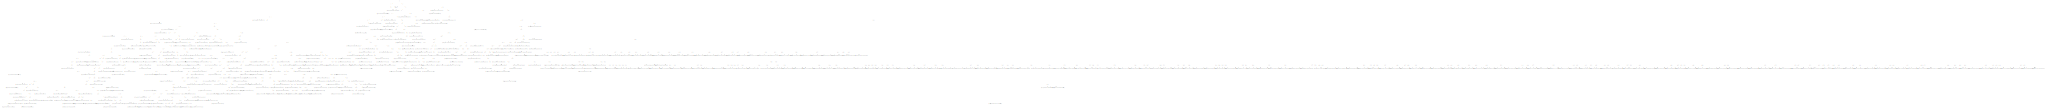

In [68]:
import heapq as hq
import graphviz as gv
import math

#ruta mas corta con dijkstra
def dijkstra(G, s): #Grafo vertices, Grafo Pesos, punto origen
  n = len(G)
  visited = [False]*n
  path = [-1]*n
  cost = [math.inf]*n

  cost[s] = 0
  pqueue = [(0, s)]
  while pqueue:
    g, u = hq.heappop(pqueue)
    if not visited[u]:
      visited[u] = True
      for v, w in G[u]:
        if not visited[v]:
          f = g + w
          if f < cost[v]:
            cost[v] = f
            path[v] = u
            hq.heappush(pqueue, (f, v))

  return path, cost

#ruta alternativa bfs
def bfs_al(G, s):
  n = len(G)
  visited = [False]*n
  path = [-1]*n # parent
  queue = [s]
  visited[s] = True

  while queue:
    u = queue.pop(0)
    for v in G[u]:
      if not visited[v]:
        visited[v] = True
        path[v] = u
        queue.append(v)

  return path

# CONVIRTIENDO A UNA SOLA LISTA ADY CON PESOS
ADL_PESOS = []
i=0
for tupla in LA:
  build = []
  j=0
  for item in tupla:
    build.append((item,Pesos[i][j]))
    j=j+1
  ADL_PESOS.append(build)
  i=i+1

#for x in ADL_PESOS:
  #print(x)

#ruta corta
path, cost = dijkstra(ADL_PESOS, 0)
#print(path)
#print(cost)
drawG_al(ADL_PESOS, True, path)

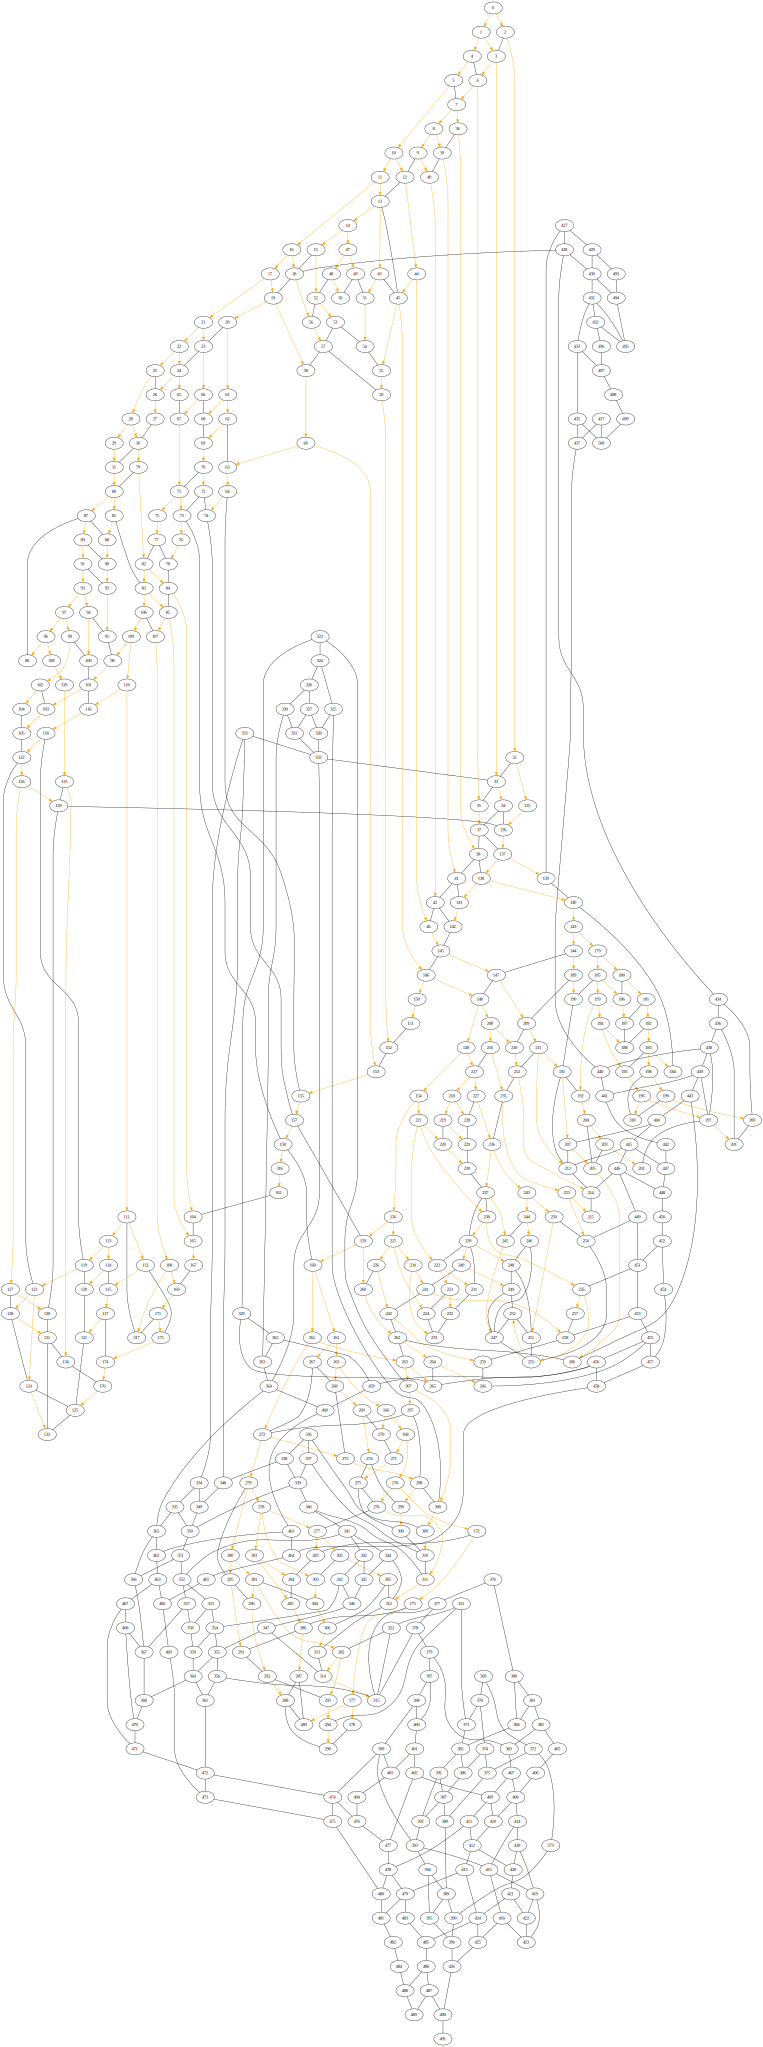

In [71]:
#ruta alternativa
#para segunda ruta, se bloqueará las primeras con Visited

path = bfs_al(LA, 0)
drawG_al(LA, path=path)


# SE RESOLVIÓ ISSUE EN EL ULTIMO COMMIT